<a href="https://colab.research.google.com/github/Arrnv/Microstructure_cv/blob/main/microstructure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Getting the data

In [ ]:
import tensorflow as tf
import os
import cv2
import imghdr
from matplotlib import pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Inspecting the data

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path('/content/drive/MyDrive/og_dataset/train')
class_name = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_name)


['air' 'oil']


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
def vew_random(target_dir, target_class):
  target_folder = target_dir+target_class
  random_image = random.sample(os.listdir(target_folder),1)[0]
  image_path = os.path.join(target_folder, random_image)
  image = mpimg.imread(image_path)
  plt.imshow(image)
  plt.title(target_class)
  plt.axis("off");

  print(f"image shape: {image.shape}")
  return image

image shape: (388, 432, 3)


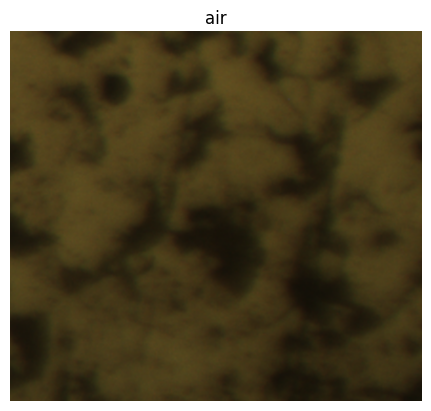

In [ ]:
img = vew_random(target_dir="/content/drive/MyDrive/og_dataset/train/", target_class="air")


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(22)
train_datagen = ImageDataGenerator(rescale=1./255)
vaid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "/content/drive/MyDrive/og_dataset/train"
test_dir = "/content/drive/MyDrive/og_dataset/test"

train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=7)

valid_data = vaid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=22,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=7)

model1 = tf.keras.models.Sequential([
     tf.keras.layers.Conv2D(16, (3, 3), strides=1, activation='relu', input_shape=(224, 224, 3)),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, (3, 3), strides=1, activation='relu'),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(16, (3, 3), strides=1, activation='relu'),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(256, activation='relu'),
     tf.keras.layers.Dense(1, activation='sigmoid')
])

model1.compile(loss = "binary_crossentropy",
               optimizer = tf.keras.optimizers.Adam(),
               metrics=["accuracy"] )

history_1 = model1.fit(train_data,
                       epochs = 10,
                       steps_per_epoch =len(train_data),
                       validation_data = valid_data,
                       validation_steps = len(valid_data))

Found 2488 images belonging to 2 classes.
Found 20 images belonging to 2 classes.
Epoch 1/10
78/78 [==============================] - 31s 370ms/step - loss: 0.3208 - accuracy: 0.8449 - val_loss: 0.2601 - val_accuracy: 0.9500
Epoch 2/10
78/78 [==============================] - 30s 380ms/step - loss: 0.2482 - accuracy: 0.8923 - val_loss: 1.4342 - val_accuracy: 0.5000
Epoch 3/10
78/78 [==============================] - 30s 386ms/step - loss: 0.1295 - accuracy: 0.9502 - val_loss: 0.2840 - val_accuracy: 0.8000
Epoch 4/10
78/78 [==============================] - 29s 373ms/step - loss: 0.1138 - accuracy: 0.9498 - val_loss: 0.2279 - val_accuracy: 0.9000
Epoch 5/10
78/78 [==============================] - 33s 424ms/step - loss: 0.0686 - accuracy: 0.9775 - val_loss: 0.0314 - val_accuracy: 1.0000
Epoch 6/10
78/78 [==============================] - 31s 392ms/step - loss: 0.2841 - accuracy: 0.8919 - val_loss: 0.3420 - val_accuracy: 0.7000
Epoch 7/10
78/78 [==============================] - 29s 375m

Perfection 💪

1/1 [==============================] - 0s 310ms/step


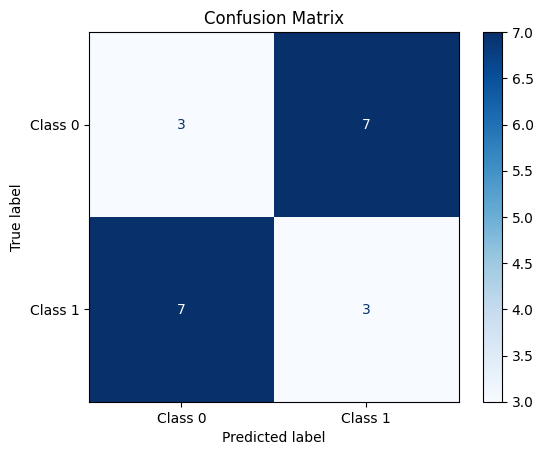

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = model1.predict(valid_data)
predicted_classes = (predictions > 0.5).astype("int32")

# Get true labels
true_labels = valid_data.classes

# Compute the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_classes)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=["Class 0", "Class 1"])
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title('Confusion Matrix')
plt.show()

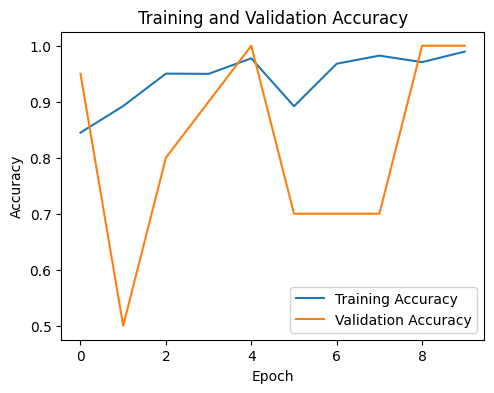

In [ ]:
import seaborn as sns
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_1.history['accuracy'], label='Training Accuracy')
plt.plot(history_1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend();
plt.show();

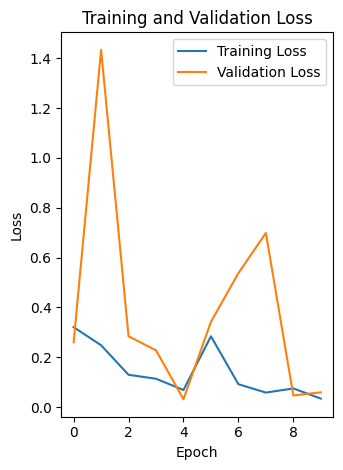

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history_1.history['loss'], label='Training Loss')
plt.plot(history_1.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()